In [ ]:
import pandas as pd                                       #data manipulation
import numpy as np

In [ ]:
df = pd.read_csv("credit.csv")                             #Loading the data into data frame
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
import scipy.cluster.hierarchy as shc

In [ ]:
X = pd.read_csv("credit.csv")

X = X.drop('CUST_ID', axis=1)

X.fillna(method='ffill', inplace = True)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_normalized = normalize(X_scaled)

X_normalized = pd.DataFrame(X_normalized)

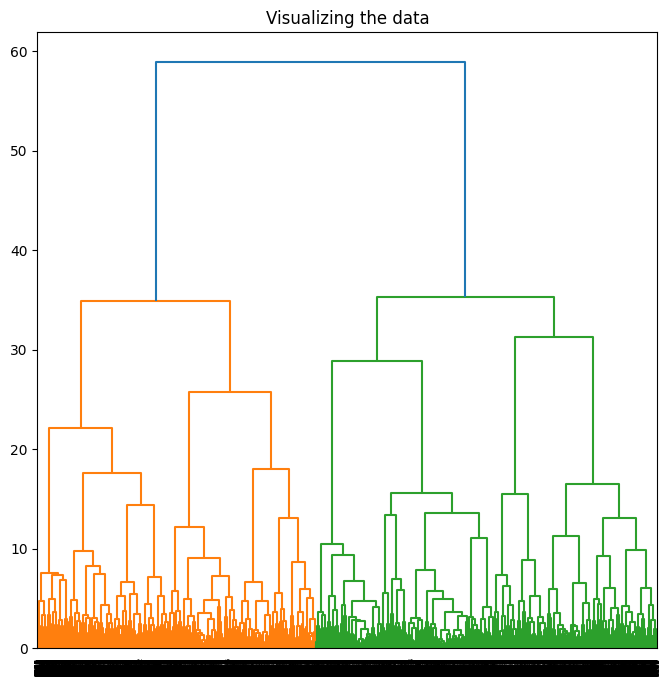

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,8))
plt.title('Visualizing the data')

Dendrogram = shc.dendrogram(shc.linkage(X_normalized, method = 'ward'))

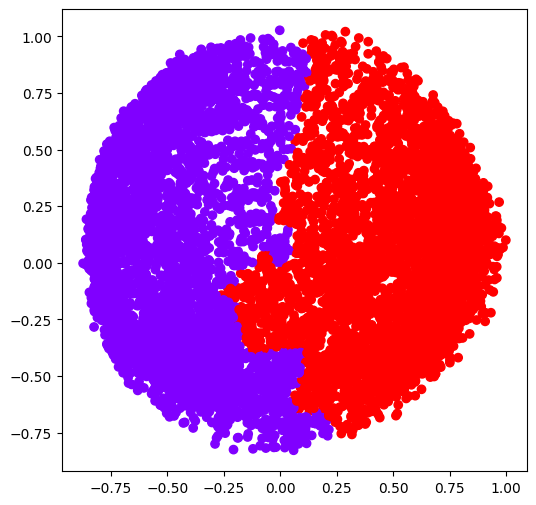

In [ ]:
from sklearn.cluster import AgglomerativeClustering


ac2 = AgglomerativeClustering(n_clusters= 2)
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

plt.figure(figsize = (6,6))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = ac2.fit_predict(X_principal), cmap = 'rainbow')
plt.show()

**Aggloromative Clustering**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
dataset = pd.read_csv("aggl.csv")
X = dataset.iloc[:,[3,4]].values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 0, 1, 0, 2, 0, 1, 3, 1, 0, 4, 2, 0, 1, 0, 2, 0, 1, 3, 1, 0, 4,
       2, 0, 1, 0, 2, 0, 1, 3, 1, 0, 4])

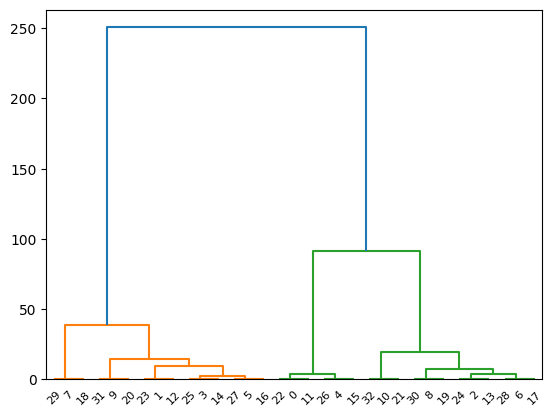

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
model = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean' , linkage = 'ward')
model.fit(X)
labels = model.labels_
labels

In [ ]:
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,normalize

X = pd.read_csv("credit (1).csv")

X = X.drop('CUST_ID', axis =1)

X.fillna(method = 'ffill', inplace = True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_normalized = normalize(X_scaled)

X_normalized = pd.DataFrame(X_normalized)
db=DBSCAN(eps=0.5, min_samples=30)
db.fit(X_normalized)

df=db.labels_
X["lables"] = df
X["lables"].value_counts()

 0    8276
-1     674
Name: lables, dtype: int64

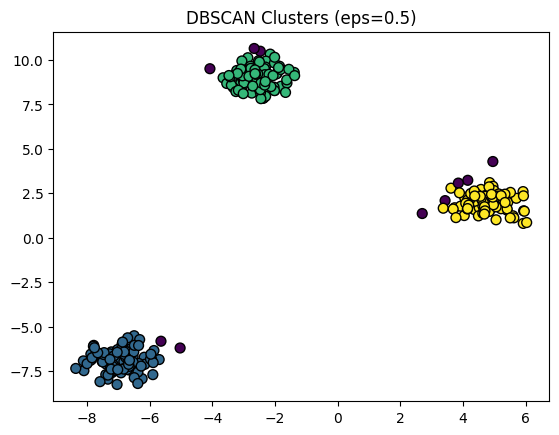

Number of Clusters: 3


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=0.60)

eps = 0.5
labels = DBSCAN(eps=eps).fit_predict(X)
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.title(f'DBSCAN Clusters (eps={eps})')
plt.show()
print(f'Number of Clusters: {num_clusters}')